# Data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
SEED = 123

In [3]:
pcc_data = pd.read_csv('/Users/alton/Documents/Python workspace/Stat 280 MZAB/Rawdata/kdd data.csv',
                      dtype = {'pcc_branch_code': str},
                      parse_dates= ['availment_date'])

pcc_data.shape

(731784, 17)

In [4]:
pcc_data.dtypes

availment_no                       object
availment_type                     object
icd_code                           object
icd_desc                           object
icd_category                       object
icd_disease_group                  object
pcc_branch_code                    object
pcc_branch_name                    object
pcc_region                         object
pcc_province                       object
pcc_city                           object
pcc_latitude                      float64
pcc_longitude                     float64
member_gender                      object
availment_date             datetime64[ns]
pcc_total_service_price           float64
member_age                        float64
dtype: object

# Data cleaning

In [5]:
# Checking of NA values
pcc_data.isna().sum()

availment_no                   0
availment_type                 0
icd_code                       0
icd_desc                       0
icd_category                   0
icd_disease_group              0
pcc_branch_code                0
pcc_branch_name                0
pcc_region                     0
pcc_province                   0
pcc_city                       0
pcc_latitude                   0
pcc_longitude                  0
member_gender               4812
availment_date                 0
pcc_total_service_price      579
member_age                 12896
dtype: int64

In [6]:
# Let's try to drop those availments without member age
print('Original size of the dataset: ',pcc_data.shape)

Original size of the dataset:  (731784, 17)


In [7]:
# Checking of negative values
pcc_data.select_dtypes(include='number').lt(0).sum()

pcc_latitude               0
pcc_longitude              0
pcc_total_service_price    0
member_age                 0
dtype: int64

In [8]:
# Check for duplicate values
pcc_data.apply(lambda x: x.duplicated().sum())

availment_no                    0
availment_type             731782
icd_code                   731652
icd_desc                   731653
icd_category               731778
icd_disease_group          731783
pcc_branch_code            731749
pcc_branch_name            731749
pcc_region                 731776
pcc_province               731773
pcc_city                   731758
pcc_latitude               731749
pcc_longitude              731749
member_gender              731781
availment_date             730658
pcc_total_service_price    725312
member_age                 731682
dtype: int64

In [9]:
# Combine the two related PCC branches
pcc_data['pcc_branch_code'] = pcc_data['pcc_branch_code'].replace({
    '521': '290'
})

## Connect to ICD dimension table

In [10]:
# Loading ICDS covered by flu vaccine program
icds = pd.read_excel('/Users/alton/Documents/Python workspace/Stat 280 MZAB/Rawdata/flu-vaccine-program-covered-diseases.xlsx')

icds['ICD Code'].unique()

array(['J10', 'J10.0', 'J10.1', 'J10.8', 'J11.0', 'J11.1', 'J11.8', 'J00',
       'B33.8', 'B34.8', 'B34.9', 'J01.0', 'J01.1', 'J01.2', 'J01.3',
       'J01.4', 'J01.8', 'J01.9', 'J02.8', 'J02.9', 'J03.8', 'J03.9',
       'J04.0', 'J04.1', 'J04.2', 'J05.0', 'J05.1', 'J06.0', 'J06.8',
       'J06.9', 'JO6.8', 'J20.4', 'J21', 'J21.0', 'J21.8', 'J21.9',
       'J18.93', 'J18.92', 'J18.23', 'J18.22', 'J18.13', 'J18.12',
       'J18.03', 'J18.02', 'J16.03', 'J16.02', 'J15.93', 'J15.92',
       'J15.73', 'J15.72', 'J15.63', 'J15.62', 'J15.53', 'J15.52',
       'J15.43', 'J15.42', 'J15.33', 'J15.32', 'J15.23', 'J15.22',
       'J15.13', 'J15.12', 'J15.03', 'J15.02', 'J14.3', 'J14.2', 'J13.3',
       'J13.2', 'J12.93', 'J12.92', 'J12.33', 'J12.32', 'J12.23',
       'J12.22', 'J12.13', 'J12.12', 'J12.03', 'J12.02', 'J09', 'J22',
       'J20.9', 'J20.8', 'J20.7', 'J20.6', 'J20.5', 'J20.3', 'J20.2',
       'J20.1', 'J20.0', 'J20', 'B05.2', 'B01.2', 'B97.8', 'B97.7',
       'B97.6', 'B97.5', 'B97.

In [11]:
pcc_data = pcc_data[pcc_data['icd_code'].isin(icds['ICD Code'].unique())]

In [12]:
pcc_data.shape

(698640, 17)

# Exploratory Data Analysis

For data privacy purposes, some EDA will be hidden.

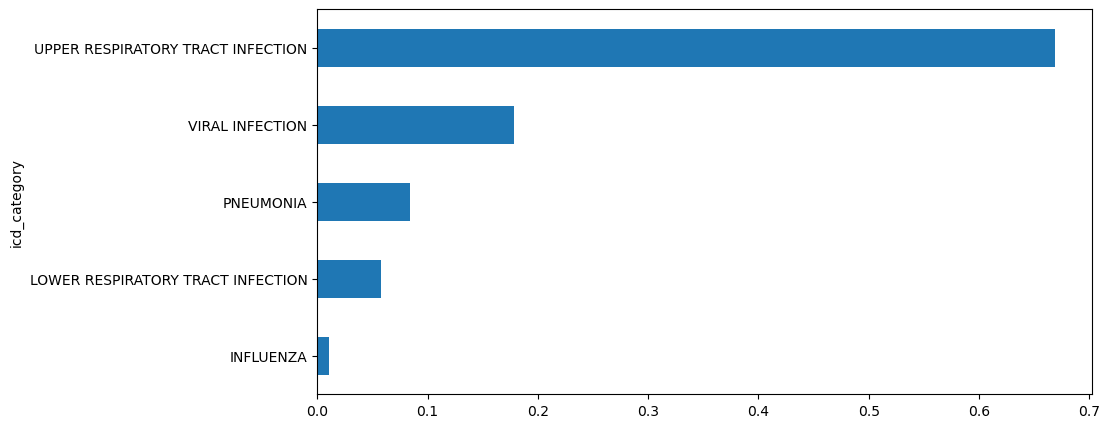

In [13]:
# Total availments per ICD Category
plt.figure(figsize=(10,5))
pcc_data['icd_category'].value_counts(ascending=True, normalize = True).plot(kind = 'barh')
plt.show()

Most of the IRD cases in PCC are URTI followed by Viral Infection. Surprisingly, Influenza got the least availment among ther diseases group

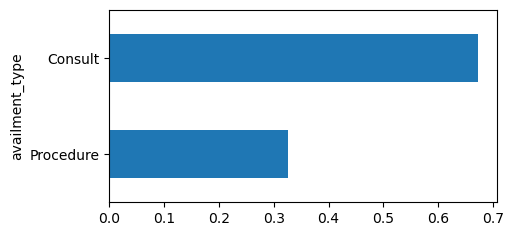

In [14]:
# Availment type distribution
plt.figure(figsize=(5,2.5))
pcc_data['availment_type'].value_counts(ascending=True, normalize=True).plot(kind = 'barh')
plt.show()

<Axes: >

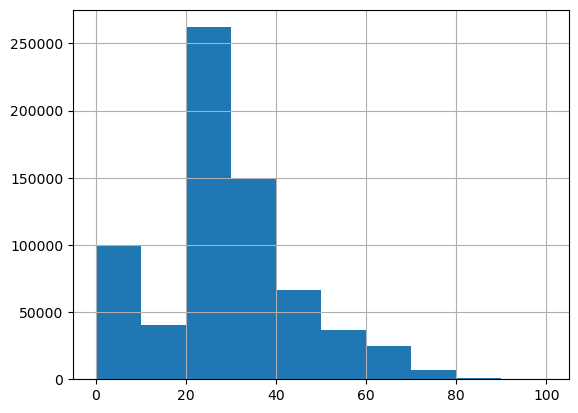

In [15]:
# Let's try to look for the age distribution of the availers
pcc_data['member_age'].hist()

<Axes: ylabel='age_group'>

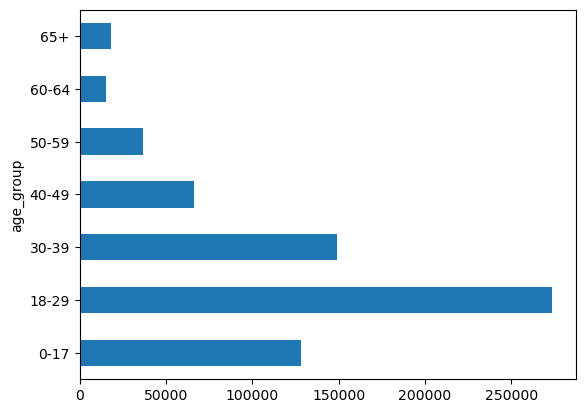

In [16]:
bins = (0, 17, 30, 40, 50, 60, 65, 100)
labels = ('0-17','18-29','30-39','40-49','50-59','60-64','65+')
pcc_data['age_group'] = pd.cut(pcc_data['member_age'], bins = bins, labels = labels, include_lowest = True, right = False)

pcc_data['age_group'].value_counts(sort = False).plot(kind = 'barh')

In [17]:
# Creation of weeknums
pcc_data['iso_year'] = pcc_data['availment_date'].dt.isocalendar().year
pcc_data['iso_week'] = pcc_data['availment_date'].dt.isocalendar().week
pcc_data['year_week'] = pcc_data['iso_year'].astype(str) + '-'  +pcc_data['iso_week'].astype(str).str.zfill(2)

# Feature Engineering

In [18]:
# Creation of dataframe
weekly_data = pcc_data.groupby(
    ['iso_year', 'iso_week', 'pcc_branch_code']
).agg({'availment_no': 'count'}).reset_index()

## Data dropping

Since the latest week's data is still incomplete, we will remove it for better analysis

In [19]:
# Remove latest week
latest_year = weekly_data['iso_year'].max()
latest_week = weekly_data.loc[
    weekly_data['iso_year'] == latest_year, 'iso_week'
].max()

weekly_data = weekly_data[
    ~((weekly_data['iso_year'] == latest_year) &
      (weekly_data['iso_week'] == latest_week))
]

In [20]:
weekly_data = weekly_data.sort_values(['pcc_branch_code', 'iso_year', 'iso_week'])	

### Connect to pcc dimension table 

In [21]:
pcc_data = pd.read_csv('/Users/alton/Documents/Python workspace/Stat 280 MZAB/Rawdata/pcc-branches-2.csv',
                      usecols = ['branchname', 'branchnumber', 'opening_date', 'pcc_lat', 'pcc_long',
       'providercode'],
                       dtype= {'branchnumber': 'object'},
                      parse_dates= ['opening_date'])

In [22]:
pcc_data = pcc_data[pcc_data['opening_date'] <= '2024-08-12']

included_pcc = pcc_data['branchnumber']
included_pcc

0     290
1     316
2     317
3     356
4     362
5     373
6     374
7     378
8     382
9     383
10    420
11    421
12    447
13    448
14    449
15    450
16    472
17    471
18    502
19    508
20    509
21    521
Name: branchnumber, dtype: object

In [23]:
# Limit the branches to remove newly opened PCCs
remove_PCC = ('508', '502', '509') 

weekly_data = weekly_data[weekly_data['pcc_branch_code'].isin(included_pcc)]
weekly_data = weekly_data[~weekly_data['pcc_branch_code'].isin(remove_PCC)]

In [24]:
temp_weekly_data = weekly_data.copy()
temp_weekly_data['year_week'] = (
    temp_weekly_data['iso_year'].astype(str) + '-' +
    temp_weekly_data['iso_week'].astype(str).str.zfill(2)
)

### Creation of clustering

In [25]:
# Creation of clustering based on average availments
pcc_averages = (
    weekly_data.groupby('pcc_branch_code')["availment_no"]
    .mean()
    .reset_index()
    .rename(columns={"availment_no": "avg_availment"})
)

In [26]:
from sklearn.cluster import KMeans

X = pcc_averages[['avg_availment']].values

# K-means model
kmeans = KMeans(n_clusters=3, random_state=SEED)
pcc_averages['cluster'] = kmeans.fit_predict(X)
pcc_averages.sort_values(by = ['cluster', 'avg_availment'])

,pcc_branch_code,avg_availment,cluster
10,420,147.633540,0
15,450,148.316456,0
7,378,161.714286,0
17,472,174.913793,0
16,471,183.692982,0
0,290,205.440994,0
3,356,205.726708,0
6,374,212.347826,0
5,373,218.627329,0
12,447,222.203822,0


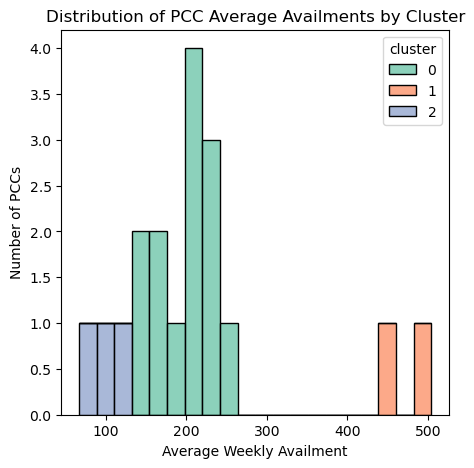

In [27]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.histplot(data=pcc_averages, x='avg_availment', hue='cluster', bins=20, palette='Set2', multiple="stack")
plt.xlabel("Average Weekly Availment")
plt.ylabel("Number of PCCs")
plt.title("Distribution of PCC Average Availments by Cluster")
plt.show()


### Creation of temporal features for XGBoost model

XGBoost does not automatically understand time or sequence. Each week in a year for each PCC branch in our dataset was treated as independent without temporal order so in order for the model to understand the trends and seasonality, creation of lag, rolling mean and rolling std features were created. 

In [28]:
# Creation of lags

lags = [1,2,3,4,52]

for lag in lags:
    weekly_data[f"lag_{lag}"] = weekly_data.groupby(['pcc_branch_code'])['availment_no'].shift(lag)

In [29]:
lead_time = 3

# Rolling mean
weekly_data["rolling_mean_4"] = weekly_data.groupby(['pcc_branch_code'])['availment_no'].rolling(4).mean().reset_index(0,drop=True)
weekly_data["rolling_mean_8"] = weekly_data.groupby(['pcc_branch_code'])['availment_no'].rolling(8).mean().reset_index(0,drop=True)
weekly_data["rolling_mean_52"] = weekly_data.groupby(['pcc_branch_code'])['availment_no'].rolling(52).mean().reset_index(0,drop=True)

# ROlling std
weekly_data["rolling_std_4"] = weekly_data.groupby(['pcc_branch_code'])['availment_no'].rolling(4).std().reset_index(0,drop=True)
weekly_data["rolling_std_52"] = weekly_data.groupby(['pcc_branch_code'])['availment_no'].rolling(52).std().reset_index(0,drop=True)

# Creation of my target (3-week prediction)
weekly_data['target'] = weekly_data.groupby(['pcc_branch_code'])['availment_no'].shift(-lead_time)

# sin/cos week
weekly_data["sin_week"] = np.sin(2 * np.pi * weekly_data["iso_week"] / 52)
weekly_data["cos_week"] = np.cos(2 * np.pi * weekly_data["iso_week"] / 52)

Since the model was designed to create a three-weak ahead forecast, the target feature was made to account for the t+3 week lead time

In [30]:
weekly_data = weekly_data.dropna()

In [31]:
# Merge clusters into weekly data
temp_weekly_data = pd.merge(
    weekly_data,
    pcc_averages[['pcc_branch_code','cluster']],
    how='left',
    on='pcc_branch_code'
)

# DF for each cluster
for cluster in temp_weekly_data['cluster'].unique():
    df_name = f"weekly_data_cluster{cluster}"
    globals()[df_name] = temp_weekly_data[temp_weekly_data['cluster'] == cluster].copy()
    print("Cluster ",cluster, "size is ", globals()[df_name].shape)


Cluster  0 size is  (1279, 18)
Cluster  1 size is  (212, 18)
Cluster  2 size is  (308, 18)


For the XGBoost algorithm, two types of model were created to account for high variation of number of cases among different PCC branches.

1. Overall Model
This model was developed to cover all the PCCs included in the dataset. The model was validated using a time series cross-validation with 12 sequential folds tested on a three-week rolling period using TimeSeries function in python. Grid Search was employed for hyperparameter optimization with the cross-validation framework. During the training process, GSCV creates multiple models with different sets of parameters. The goal of this process is to evaluate each of these models and select the best out of it (Adnan, Alarood, Uddin, & ur Rehman, 2022).

2. Per Cluster
There’s a high variation in data availability and the number of availments per PCC branch. This is primarily due to the opening dates of the clinics, as some are relatively new compared to others. A clustering technique was applied to the PCC branches based on their average number of availments. K-means with three clusters was used to group the branches (see Fig. 7). K-means algorithm searches for a K-partition with locally optimal within-cluster sum of squares based on Euclidean  distance, by transferring each point from one to another (J. A. Hartigan, M. A. Wong, 1979).


# Global Model

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from xgboost import XGBRegressor

## OneHotEncoding

In [33]:
# OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit encoder on branch column
encoded = encoder.fit_transform(weekly_data[['pcc_branch_code']])

# Convert to DataFrame
weekly_data_transformed = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['pcc_branch_code']),
    index=weekly_data.index
)

# Combine with rest of weekly_data (drop the original categorical and target column kept separately)
X = pd.concat([
    weekly_data.drop(columns=['pcc_branch_code', 'target', 'availment_no']),
    weekly_data_transformed
], axis=1)

# Target variable (1-week ahead)
y = weekly_data['target']


## Train and test split

During the data preparation, the dataset was split using the holdout method and the time series splitting. Generally, the model was split based on the time stamp of the 15th week of the 2025 where 20 weeks were used as the test set and the remaining data were divided into 12 sequential folds tested on a three-week rolling period for time series cross- validation. This approach ensured that the temporal order of the data was preserved while also validating it into multiple sequential folds.


In [34]:
# Cut off week
cutoff_year = 2025
cutoff_week = 15


test_mask = (weekly_data['iso_year'] > cutoff_year) | (
    (weekly_data['iso_year'] == cutoff_year) & (weekly_data['iso_week'] >= cutoff_week)
)

# train/test split
X_train = X[~test_mask]
X_test  = X[test_mask]

y_train = y[~test_mask]
y_test  = y[test_mask]

In [35]:
print("Size of train set", X_train.shape)
print("Size of test set", X_test.shape)

Size of train set (1403, 32)
Size of test set (396, 32)


## GridSearch CV

A general function was developed to fit both the overall model and per-cluster models. The function includes time series splitting, a base XGBoost model, grid search, and fitting the final XGBoost model based on the best parameters found. The XGBoost library was used for the XGBRegressor fitting, time series split and grid search cross validation came from scikit-learn model selection library.  The hyperparameter grid used for the XGBoost model is summarized below:

In [36]:
# XGB with grid search CV
def train_xgb_with_gridsearch(
    X_train, X_test,
    y_train, y_test,
    seed=SEED,
    n_splits=12
):
    # Time Series Split
    tscv = TimeSeriesSplit(n_splits=n_splits, test_size=3)

    # XGB Parameter Grid
    xgb_param = {
        "max_depth": [3,4],
        "learning_rate": [0.01, 0.05, 0.1],
        "n_estimators": [50, 100, 200],
        "gamma": [0.1, 0.5, 1],
        "subsample": [0.5, 0.7, 0.9],
        "colsample_bytree": [0.3, 0.5, 0.9],
        "min_child_weight": [5, 10],
        "reg_alpha": [0.5, 1, 2],
        "reg_lambda": [1, 2, 5],
    }

    # Evaluation Sets
    eval_set = [(X_train, y_train), (X_test, y_test)]

    # Base Model
    xgb_model = XGBRegressor(
        objective='reg:squarederror',
        tree_method='hist',
        n_jobs=-1,
        random_state=seed,
        seed=seed,
        reg_alpha=0.5,
        reg_lambda=1.5
    )

    # Grid Search
    gridxg = GridSearchCV(
        estimator=xgb_model,
        param_grid=xgb_param,
        cv=tscv,
        verbose=1,
        n_jobs=-1
    )

    # Train Grid Search
    gridxg.fit(X_train, y_train)
    best_xgb = gridxg.best_estimator_
    print("\nBest Parameters Found:")
    print(gridxg.best_params_)

    # Refit best model with eval_set
    best_xgb.fit(
        X_train, y_train,
        eval_set=eval_set,
        verbose=False
    )

    # Predict test set
    y_pred = best_xgb.predict(X_test)

    return best_xgb, y_pred, gridxg.best_params_


In [37]:
# Overall Fit
best_xgb, y_pred, best_params = train_xgb_with_gridsearch(
    X_train, X_test,
    y_train, y_test,
    seed=SEED,
    n_splits=12
)

Fitting 12 folds for each of 8748 candidates, totalling 104976 fits

Best Parameters Found:
{'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 2, 'subsample': 0.9}


In [38]:
weekly_data.loc[y_test.index, "prediction"] = y_pred

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [40]:
def metrics_xgb(model, X_train, X_test, y_train, y_test):

    # Predictions
    train_pred = model.predict(X_train)
    test_pred  = model.predict(X_test)

    # Sample sizes
    n_train = len(y_train)
    n_test  = len(y_test)

    # Number of features (k parameters ≈ features + intercept)
    k = X_train.shape[1] + 1  

    # MSE
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse  = mean_squared_error(y_test, test_pred)

    # R2
    r2_train = r2_score(y_train, train_pred)
    r2_test  = r2_score(y_test, test_pred)

    # Adjusted R2
    adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - k - 1)
    adj_r2_test  = 1 - (1 - r2_test) * (n_test - 1) / (n_test - k - 1)

    # AIC
    train_aic = n_train * np.log(train_mse) + 2 * k
    test_aic  = n_test * np.log(test_mse) + 2 * k

    # sMAPE
    train_smape = 100 * np.mean(2 * np.abs(train_pred - y_train) / (np.abs(y_train) + np.abs(train_pred)))
    test_smape  = 100 * np.mean(2 * np.abs(test_pred - y_test) / (np.abs(y_test) + np.abs(test_pred)))

    metrics_dict = {
        "RMSE": [np.sqrt(train_mse), np.sqrt(test_mse)],
        "MSE": [train_mse, test_mse],
        "MAE": [
            mean_absolute_error(y_train, train_pred),
            mean_absolute_error(y_test, test_pred)
        ],
        "MAPE": [
            np.mean(np.abs((y_train - train_pred) / y_train)) * 100,
            np.mean(np.abs((y_test - test_pred) / y_test)) * 100
        ],
        "sMAPE": [train_smape, test_smape],
        "R2": [r2_train, r2_test],
        "Adjusted R2": [adj_r2_train, adj_r2_test],
        "AIC": [train_aic, test_aic]
    }

    metrics_df = pd.DataFrame(metrics_dict, index=["Train", "Test"]).T
    return metrics_df

In [41]:
results_overall = metrics_xgb(best_xgb, X_train, X_test, y_train, y_test)
results_overall

,Train,Test
RMSE,30.625245,83.107460
MSE,937.905614,6906.849963
MAE,23.480185,59.205755
MAPE,11.661886,23.032898
sMAPE,10.997223,22.278404
R2,0.957872,0.645670
Adjusted R2,0.956857,0.613369
AIC,9667.639995,3566.746503


In [42]:
def features_xgb(model, X_train, top_n=20):

    # Feature importance values from model
    importance_vals = model.feature_importances_

    # Create DataFrame sorted by importance
    feat_importance_df = pd.DataFrame({
        "feature": X_train.columns,
        "importance": importance_vals
    }).sort_values(by="importance", ascending=False)

    print("\nTop Feature Importances:")
    print(feat_importance_df.head(top_n))

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(feat_importance_df["feature"].head(top_n),
             feat_importance_df["importance"].head(top_n))
    plt.gca().invert_yaxis()
    plt.title(f"Top {top_n} Feature Importances (XGBoost)")
    plt.tight_layout()
    plt.show()

    return feat_importance_df


Top Feature Importances:
                feature  importance
7        rolling_mean_4    0.449487
2                 lag_1    0.168737
25  pcc_branch_code_421    0.086000
8        rolling_mean_8    0.062418
12             sin_week    0.031208
27  pcc_branch_code_448    0.030864
9       rolling_mean_52    0.022230
1              iso_week    0.019432
0              iso_year    0.013841
13             cos_week    0.010009
22  pcc_branch_code_382    0.008541
17  pcc_branch_code_356    0.008186
20  pcc_branch_code_374    0.007632
6                lag_52    0.007339
11       rolling_std_52    0.006450
14  pcc_branch_code_290    0.006358
24  pcc_branch_code_420    0.006159
18  pcc_branch_code_362    0.005731
21  pcc_branch_code_378    0.005604
26  pcc_branch_code_447    0.005251


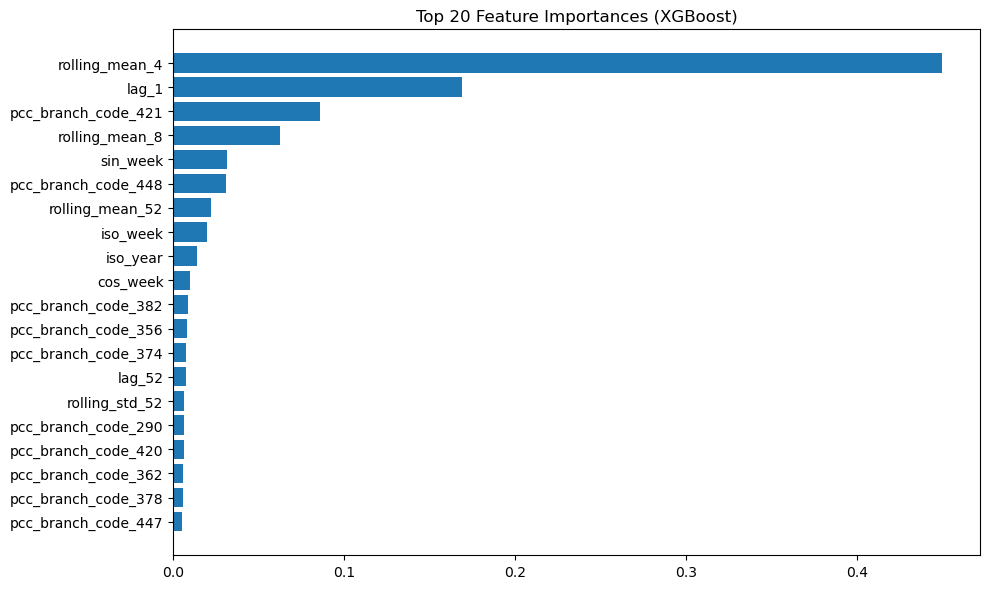

In [43]:
feat_table = features_xgb(best_xgb, X_train, top_n=20)

This model uses 12 folds with a 3 weeks rolling validation period for time series cross-validation, the cut off week for the test set is 15th of 2025. After Fitting 12 folds for each of 8748 candidates, totalling 104976 fits, the best parameters were found to be {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 2, 'subsample': 0.5}.  

Looking at the model’s accuracy (MAPE, sMAPE), the training and test set reflects a minor overfitting, which is expected in a high-dimensional time series with multiple branches. Overall, the model looks good on providing three-week forecasts for vaccine allocation across different PCC branches with a MAPE of 15% on train set and 22% on unseen data.


In [44]:
def plot_time_series_cv(X_train, X_test, n_splits=8, test_size=3, title="Time Series CV Splits"):
    tscv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size)
    
    plt.figure(figsize=(16, 8))
    colors = {'train': 'skyblue', 'test': 'salmon'}

    # Assuming X_train and X_test have a DatetimeIndex or columns with year and week info
    # Extract ISO year and week information
    # If your data structure is different, adjust these lines accordingly
    
    # Option 1: If you have datetime index
    if hasattr(X_train.index, 'isocalendar'):
        train_labels = [f"{date.isocalendar()[0]}-W{date.isocalendar()[1]}" 
                       for date in X_train.index]
        test_labels = [f"{date.isocalendar()[0]}-W{date.isocalendar()[1]}" 
                      for date in X_test.index]
    
    # Option 2: If you have separate year and week columns
    elif 'iso_year' in X_train.columns and 'iso_week' in X_train.columns:
        train_labels = [f"{row.iso_year}-W{row.iso_week}" 
                       for _, row in X_train.iterrows()]
        test_labels = [f"{row.iso_year}-W{row.iso_week}" 
                      for _, row in X_test.iterrows()]
    
    # Option 3: Fallback to index positions with a warning
    else:
        print("Warning: Could not find ISO year/week information. Using index positions instead.")
        train_labels = [str(i) for i in range(len(X_train))]
        test_labels = [str(i) for i in range(len(X_train), len(X_train) + len(X_test))]
    
    # Create a mapping from index position to label for x-tick positioning
    all_indices = list(range(len(X_train) + len(X_test)))
    all_labels = train_labels + test_labels
    
    # Get the splits
    splits = list(tscv.split(X_train))
    
    # Plot each fold
    for i, (train_index, test_index) in enumerate(splits):
        # Plot training set
        plt.plot(train_index, [i+1]*len(train_index), color=colors['train'], linewidth=8)
        
        # Plot test set
        plt.plot(test_index, [i+1]*len(test_index), color=colors['test'], linewidth=8)

    # Overlay final test set
    final_test_start = len(X_train)
    final_test_end = len(X_train) + len(X_test)
    plt.plot(range(final_test_start, final_test_end), [0]*len(X_test), 
             color='green', linewidth=8)

    # Set x-ticks to show some of the week labels
    # Show approximately 10-15 ticks to avoid overcrowding
    step = max(1, len(all_indices) // 12)
    tick_positions = all_indices[::step]
    tick_labels = [all_labels[i] for i in tick_positions]
    plt.xticks(tick_positions, tick_labels, rotation=45)
    
    plt.xlabel('ISO Year-Week', fontsize=12)
    plt.ylabel('CV Fold', fontsize=12)
    plt.title(f"{title} (Test Size: {test_size} weeks)", fontsize=14)
    plt.yticks(list(range(1, n_splits+1))+[0], 
               labels=[f'Fold {i+1}' for i in range(n_splits)] + ['Final Test'])
    
    # Create custom legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='skyblue', lw=4, label='Training Set (Expanding)'),
        Line2D([0], [0], color='salmon', lw=4, label=f'Validation Set ({test_size} weeks)'),
        Line2D([0], [0], color='green', lw=4, label='Final Test Set')
    ]
    plt.legend(handles=legend_elements, loc='upper left', fontsize=10)
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

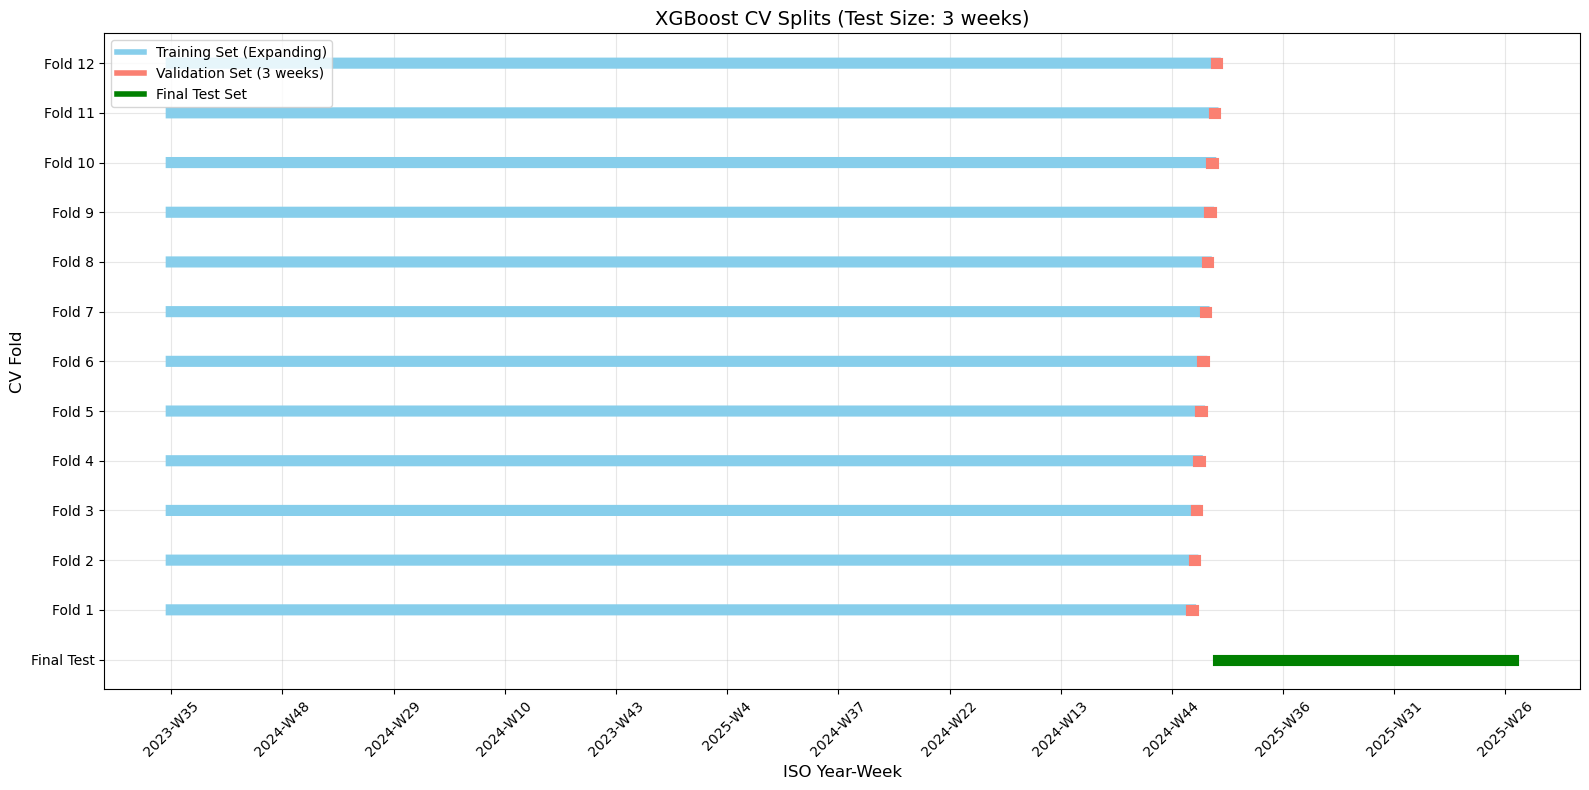

In [45]:
plot_time_series_cv(X_train, X_test, n_splits=12, title="XGBoost CV Splits")

# per Cluster Model

Three clusters were made for the dataset based on their average availments. Following the same parameter grid, the same function used for the overall model was used to fit the XGBoost model and do a k-fold time series cross validation for each cluster. 

In [46]:
# XGB with grid search CV
def train_xgb_with_gridsearch2(
    X_train, X_test,
    y_train, y_test,
    seed=SEED,
    n_splits=8
):
    # Time Series Split
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # XGB Parameter Grid
    xgb_param = {
        "max_depth": [2,3,4],
        "learning_rate": [0.01, 0.05, 0.1],
        "n_estimators": [50, 100, 200, 300],
        "gamma": [0.1, 0.5, 1],
        "subsample": [0.5, 0.7, 0.9],
        "colsample_bytree": [0.3, 0.5, 0.9],
        "min_child_weight": [5, 10],
        "reg_alpha": [0.5, 1, 2],
        "reg_lambda": [1, 2, 5],
    }

    # Evaluation Sets
    eval_set = [(X_train, y_train), (X_test, y_test)]

    # Base Model
    xgb_model = XGBRegressor(
        objective='reg:squarederror',
        tree_method='hist',
        n_jobs=-1,
        random_state=seed,
        seed=seed,
        reg_alpha=0.5,
        reg_lambda=1.5
    )

    # Grid Search
    gridxg = GridSearchCV(
        estimator=xgb_model,
        param_grid=xgb_param,
        cv=tscv,
        verbose=1,
        n_jobs=-1
    )

    # Train Grid Search
    gridxg.fit(X_train, y_train)
    best_xgb = gridxg.best_estimator_
    print("\nBest Parameters Found:")
    print(gridxg.best_params_)

    # Refit best model with eval_set
    best_xgb.fit(
        X_train, y_train,
        eval_set=eval_set,
        verbose=False,
        early_stopping_rounds=20
    )

    # Predict test set
    y_pred = best_xgb.predict(X_test)

    return best_xgb, y_pred, gridxg.best_params_


## Cluster 2

In [47]:
temp_weekly_data = weekly_data_cluster2.copy()
temp_weekly_data['year_week'] = (
    temp_weekly_data['iso_year'].astype(str) + '-' +
    temp_weekly_data['iso_week'].astype(str).str.zfill(2)
)

In [48]:
# Get unique branches
branches = temp_weekly_data["pcc_branch_code"].unique()
branches

array(['383', '448', '449'], dtype=object)

### OneHotEncoding

In [49]:
# OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit encoder on branch column
encoded = encoder.fit_transform(weekly_data_cluster2[['pcc_branch_code']])

# Convert to DataFrame
weekly_data_transformed = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['pcc_branch_code']),
    index=weekly_data_cluster2.index
)

# Combine with rest of weekly_data (drop the original categorical and target column kept separately)
X_clus2 = pd.concat([
    weekly_data_cluster2.drop(columns=['pcc_branch_code', 'target', 'availment_no', 'cluster']),
    weekly_data_transformed
], axis=1)

# Target variable (1-week ahead)
y_clus2 = weekly_data_cluster2['target']


### Train and Test split

In [50]:
# Cut off week
cutoff_year = 2025
cutoff_week = 15


test_mask = (weekly_data_cluster2['iso_year'] > cutoff_year) | (
    (weekly_data_cluster2['iso_year'] == cutoff_year) & (weekly_data_cluster2['iso_week'] >= cutoff_week)
)

# train/test split
X_train_clus2 = X_clus2[~test_mask]
X_test_clus2  = X_clus2[test_mask]

y_train_clus2 = y_clus2[~test_mask]
y_test_clus2  = y_clus2[test_mask]

### GridSearchCV with XGBoost

In [51]:
clus2_xgb, clus2_y_pred, clus2_params = train_xgb_with_gridsearch(
    X_train_clus2, X_test_clus2,
    y_train_clus2, y_test_clus2,
    seed=SEED,
    n_splits=12
)

Fitting 12 folds for each of 8748 candidates, totalling 104976 fits

Best Parameters Found:
{'colsample_bytree': 0.3, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 200, 'reg_alpha': 2, 'reg_lambda': 2, 'subsample': 0.7}


In [52]:
clus2_params

{'colsample_bytree': 0.3,
 'gamma': 0.5,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 200,
 'reg_alpha': 2,
 'reg_lambda': 2,
 'subsample': 0.7}

In [53]:
weekly_data_cluster2.loc[y_test_clus2.index, "prediction"] = clus2_y_pred

In [54]:
results_clus2 = metrics_xgb(clus2_xgb, X_train_clus2, X_test_clus2, y_train_clus2, y_test_clus2)
results_clus2

,Train,Test
RMSE,5.487511,39.579846
MSE,30.112774,1566.564190
MAE,4.364713,27.126850
MAPE,4.948177,19.990075
sMAPE,4.776471,22.559488
R2,0.986352,0.178712
Adjusted R2,0.985250,-0.135824
AIC,859.997770,521.538246



Top Feature Importances:
                feature  importance
16  pcc_branch_code_449    0.214663
15  pcc_branch_code_448    0.167592
2                 lag_1    0.103742
8        rolling_mean_8    0.088580
12             sin_week    0.049478
0              iso_year    0.043435
6                lag_52    0.042422
3                 lag_2    0.040738
1              iso_week    0.039975
5                 lag_4    0.038066
4                 lag_3    0.033508
13             cos_week    0.033325
9       rolling_mean_52    0.029030
7        rolling_mean_4    0.021696
10        rolling_std_4    0.018298
11       rolling_std_52    0.017915
14  pcc_branch_code_383    0.017538


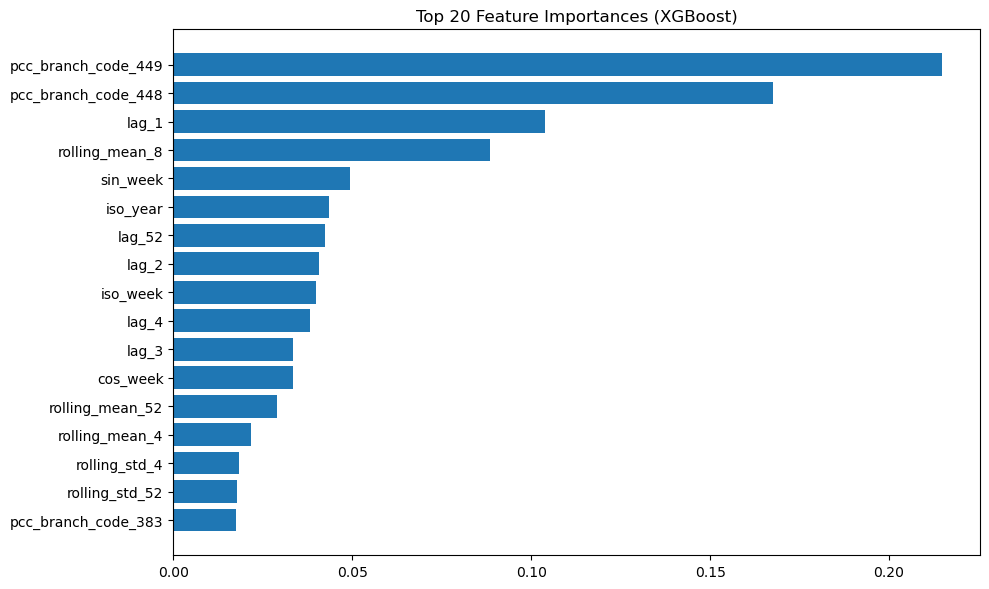

In [55]:
feat_clus2 = features_xgb(clus2_xgb, X_train_clus2, top_n=20)

After fitting Fitting 12 folds, the best parameter found: {'colsample_bytree': 0.3, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 1, 'subsample': 0.9}

For this cluster, branches with average availments were grouped. For the error metrics, the test set is also higher compared to the training set showing a slight to moderate difference. Based on MAPE, the predictions deviate 20% from the actual three-week forecast while only 5% on the train set. For feature importance, lag t-1 feature is the most important followed by the rolling mean and cycle feature for the weeknum.


## Cluster 1

In [56]:
temp_weekly_data = weekly_data_cluster1.copy()
temp_weekly_data['year_week'] = (
    temp_weekly_data['iso_year'].astype(str) + '-' +
    temp_weekly_data['iso_week'].astype(str).str.zfill(2)
)

In [57]:
# Get unique branches
branches = temp_weekly_data["pcc_branch_code"].unique()
branches

array(['317', '421'], dtype=object)

### OneHotEncoding

In [58]:
# OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit encoder on branch column
encoded = encoder.fit_transform(weekly_data_cluster1[['pcc_branch_code']])

# Convert to DataFrame
weekly_data_transformed = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['pcc_branch_code']),
    index=weekly_data_cluster1.index
)

# Combine with rest of weekly_data (drop the original categorical and target column kept separately)
X_clus1 = pd.concat([
    weekly_data_cluster1.drop(columns=['pcc_branch_code', 'target', 'availment_no', 'cluster']),
    weekly_data_transformed
], axis=1)

# Target variable (1-week ahead)
y_clus1 = weekly_data_cluster1['target']


### Train and Test split

In [59]:
# Cut off week
cutoff_year = 2025
cutoff_week = 15


test_mask = (weekly_data_cluster1['iso_year'] > cutoff_year) | (
    (weekly_data_cluster1['iso_year'] == cutoff_year) & (weekly_data_cluster1['iso_week'] >= cutoff_week)
)

# train/test split
X_train_clus1 = X_clus1[~test_mask]
X_test_clus1  = X_clus1[test_mask]

y_train_clus1 = y_clus1[~test_mask]
y_test_clus1  = y_clus1[test_mask]

### GridSearchCV with XGBoost

In [60]:
clus1_xgb, clus1_y_pred, clus1_params = train_xgb_with_gridsearch(
    X_train_clus1, X_test_clus1,
    y_train_clus1, y_test_clus1,
    seed=SEED,
    n_splits=12
)

Fitting 12 folds for each of 8748 candidates, totalling 104976 fits

Best Parameters Found:
{'colsample_bytree': 0.3, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 50, 'reg_alpha': 2, 'reg_lambda': 2, 'subsample': 0.7}


In [61]:
clus1_params

{'colsample_bytree': 0.3,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 10,
 'n_estimators': 50,
 'reg_alpha': 2,
 'reg_lambda': 2,
 'subsample': 0.7}

In [62]:
weekly_data_cluster1.loc[y_test_clus1.index, "prediction"] = clus1_y_pred

In [63]:
results_clus1 = metrics_xgb(clus1_xgb, X_train_clus1, X_test_clus1, y_train_clus1, y_test_clus1)
results_clus1

,Train,Test
RMSE,49.401157,166.839041
MSE,2440.474307,27835.265648
MAE,37.464715,142.330182
MAPE,7.614115,46.996379
sMAPE,7.264144,34.027696
R2,0.866618,0.086500
Adjusted R2,0.851501,-0.510788
AIC,1344.391211,484.298598



Top Feature Importances:
                feature  importance
8        rolling_mean_8    0.108712
7        rolling_mean_4    0.090603
1              iso_week    0.090417
3                 lag_2    0.089185
12             sin_week    0.084827
0              iso_year    0.077306
4                 lag_3    0.075973
14  pcc_branch_code_317    0.053119
2                 lag_1    0.051363
15  pcc_branch_code_421    0.050078
13             cos_week    0.044417
9       rolling_mean_52    0.043924
11       rolling_std_52    0.041300
5                 lag_4    0.040072
6                lag_52    0.038612
10        rolling_std_4    0.020092


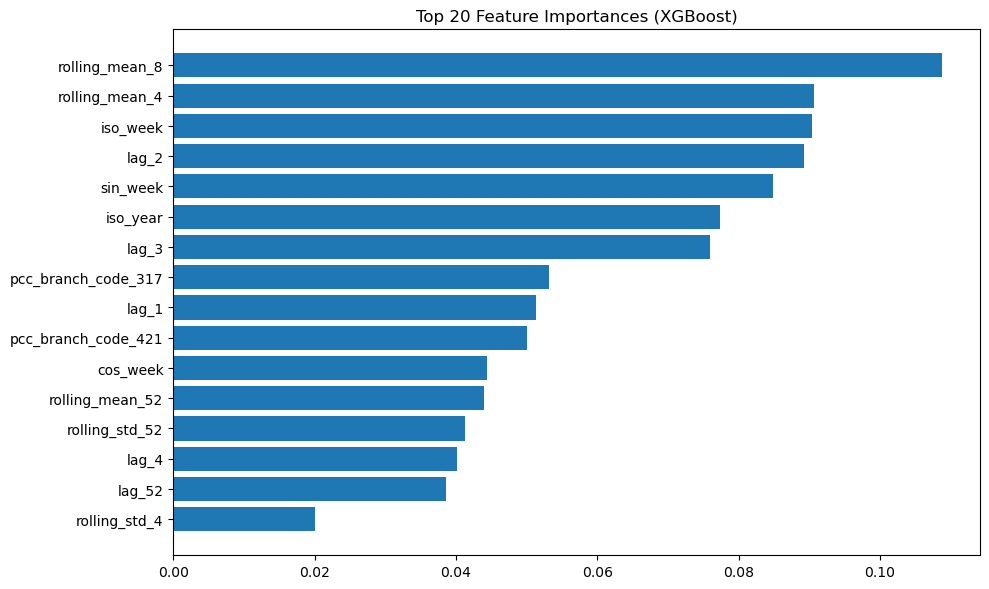

In [64]:
feat_clus1 = features_xgb(clus1_xgb, X_train_clus1, top_n=20)

After fitting Fitting 12 folds, the best parameter found: {'colsample_bytree': 0.3, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 50, 'reg_alpha': 2, 'reg_lambda': 2, 'subsample': 0.7}

This cluster includes PCC branches with the highest average availment. Error metrics got a very huge difference from training to test set, suggesting a very poor predictive performance on unseen data. Based on MAPE, it jumped from 7.6% on the train set to 47% on the test set. This mode is overfitting based on its MAPE and sMAPE which can be connected to the limited number of branches included for the model. In terms of feature importance, rolling mean features are the most important followed by other cycle related features.


## Cluster 0

In [65]:
temp_weekly_data = weekly_data_cluster0.copy()
temp_weekly_data['year_week'] = (
    temp_weekly_data['iso_year'].astype(str) + '-' +
    temp_weekly_data['iso_week'].astype(str).str.zfill(2)
)

In [66]:
# Get unique branches
branches = temp_weekly_data["pcc_branch_code"].unique()
branches

array(['290', '316', '356', '362', '373', '374', '378', '382', '420',
       '447', '450', '471', '472'], dtype=object)

### OneHotEncoding

In [67]:
# OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit encoder on branch column
encoded = encoder.fit_transform(weekly_data_cluster0[['pcc_branch_code']])

# Convert to DataFrame
weekly_data_transformed = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['pcc_branch_code']),
    index=weekly_data_cluster0.index
)

# Combine with rest of weekly_data (drop the original categorical and target column kept separately)
X_clus0 = pd.concat([
    weekly_data_cluster0.drop(columns=['pcc_branch_code', 'target', 'availment_no', 'cluster']),
    weekly_data_transformed
], axis=1)

# Target variable (1-week ahead)
y_clus0 = weekly_data_cluster0['target']


### Train and Test split

In [68]:
# Cut off week
cutoff_year = 2025
cutoff_week = 15


test_mask = (weekly_data_cluster0['iso_year'] > cutoff_year) | (
    (weekly_data_cluster0['iso_year'] == cutoff_year) & (weekly_data_cluster0['iso_week'] >= cutoff_week)
)

# train/test split
X_train_clus0 = X_clus0[~test_mask]
X_test_clus0  = X_clus0[test_mask]

y_train_clus0 = y_clus0[~test_mask]
y_test_clus0  = y_clus0[test_mask]

### GridSearchCV with XGBoost

In [69]:
clus0_xgb, clus0_y_pred, clus0_params = train_xgb_with_gridsearch(
    X_train_clus0, X_test_clus0,
    y_train_clus0, y_test_clus0,
    seed=SEED,
    n_splits=12
)

Fitting 12 folds for each of 8748 candidates, totalling 104976 fits

Best Parameters Found:
{'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'reg_alpha': 2, 'reg_lambda': 2, 'subsample': 0.7}


In [70]:
clus0_params

{'colsample_bytree': 0.5,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 100,
 'reg_alpha': 2,
 'reg_lambda': 2,
 'subsample': 0.7}

In [71]:
weekly_data_cluster0.loc[y_test_clus0.index, "prediction"] = clus0_y_pred

In [72]:
results_clus0 = metrics_xgb(clus0_xgb, X_train_clus0, X_test_clus0, y_train_clus0, y_test_clus0)
results_clus0

,Train,Test
RMSE,35.787892,96.557981
MSE,1280.773190,9323.443748
MAE,27.533627,68.333578
MAPE,12.115132,25.999082
sMAPE,11.628735,25.167947
R2,0.847618,0.326516
Adjusted R2,0.843192,0.253140
AIC,7161.132695,2670.122179



Top Feature Importances:
                feature  importance
2                 lag_1    0.235153
7        rolling_mean_4    0.177728
1              iso_week    0.064665
12             sin_week    0.060384
8        rolling_mean_8    0.053834
17  pcc_branch_code_362    0.035461
0              iso_year    0.033780
21  pcc_branch_code_382    0.032511
6                lag_52    0.028720
9       rolling_mean_52    0.025174
3                 lag_2    0.025061
19  pcc_branch_code_374    0.024252
13             cos_week    0.023650
16  pcc_branch_code_356    0.020959
15  pcc_branch_code_316    0.019185
14  pcc_branch_code_290    0.018596
11       rolling_std_52    0.017415
10        rolling_std_4    0.016560
23  pcc_branch_code_447    0.016204
24  pcc_branch_code_450    0.015865


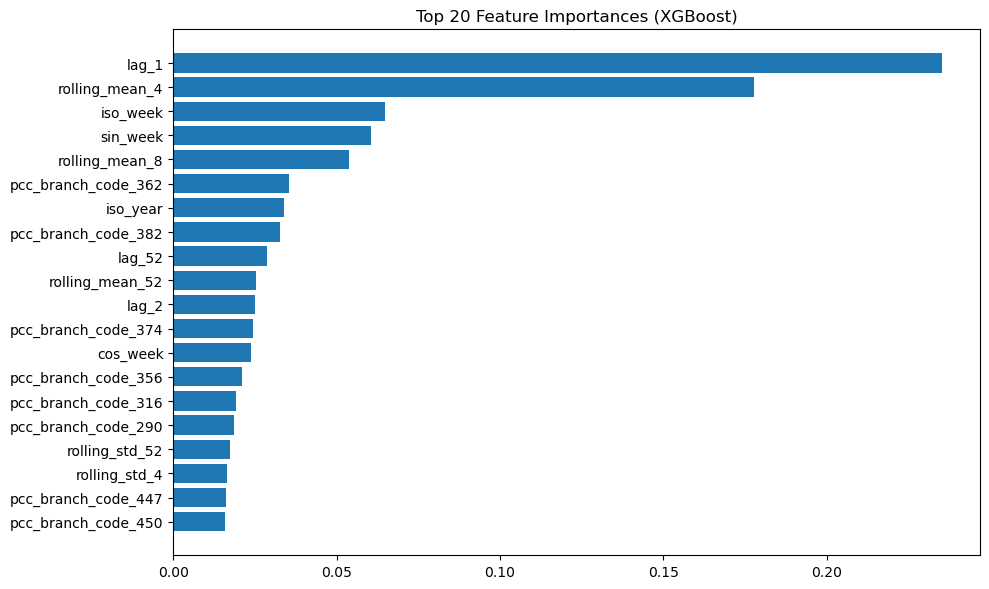

In [73]:
feat_clus0 = features_xgb(clus0_xgb, X_train_clus0, top_n=20)

After fitting Fitting 12 folds, the best parameter found: {'colsample_bytree': 0.3, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 200, 'reg_alpha': 2, 'reg_lambda': 1, 'subsample': 0.9}

Looking at the accuracy metrics of this cluster, it has a MAPE of 12.11% on the train set and 25.99% on the test set. Overall, the model shows a moderate overfitting issue which is slightly higher on what was observed in the overall XGBoost model. In terms of the feature importance, the lag features are one of the highest followed by the one hot encoding.


# Results Comparison & Conclusion

In [74]:
# Add a column to identify each model/cluster
results_overall['Model'] = 'Overall'
results_clus0['Model'] = 'Cluster 0'
results_clus1['Model'] = 'Cluster 1'
results_clus2['Model'] = 'Cluster 2'

# Combine all results
all_results = pd.concat([results_overall, results_clus0, results_clus1, results_clus2], axis=0)

# Reset index
all_results = all_results.reset_index().rename(columns={'index': 'Metric'})

# Ensure column order: Metric, Model, Train, Test
cols_order = ['Metric', 'Model', 'Train', 'Test']
all_results = all_results[cols_order]

# Define the preferred metric order for rows
metric_order = ['R2', 'Adjusted R2', 'MSE', 'RMSE', 'MAE', 'MAPE', 'sMAPE', 'AIC']

# Sort rows by this order, keeping models together
all_results['Metric'] = pd.Categorical(all_results['Metric'], categories=metric_order, ordered=True)
all_results = all_results.sort_values(['Metric', 'Model']).reset_index(drop=True)

all_results

,Metric,Model,Train,Test
0,R2,Cluster 0,0.847618,0.326516
1,R2,Cluster 1,0.866618,0.086500
2,R2,Cluster 2,0.986352,0.178712
3,R2,Overall,0.957872,0.645670
4,Adjusted R2,Cluster 0,0.843192,0.253140
5,Adjusted R2,Cluster 1,0.851501,-0.510788
6,Adjusted R2,Cluster 2,0.985250,-0.135824
7,Adjusted R2,Overall,0.956857,0.613369
8,MSE,Cluster 0,1280.773190,9323.443748
9,MSE,Cluster 1,2440.474307,27835.265648


In [75]:
include_metrics = ('Adjusted R2', 'R2', 'MAPE', 'sMAPE', 'AIC')
all_results[all_results['Metric'].isin(include_metrics)]

,Metric,Model,Train,Test
0,R2,Cluster 0,0.847618,0.326516
1,R2,Cluster 1,0.866618,0.086500
2,R2,Cluster 2,0.986352,0.178712
3,R2,Overall,0.957872,0.645670
4,Adjusted R2,Cluster 0,0.843192,0.253140
5,Adjusted R2,Cluster 1,0.851501,-0.510788
6,Adjusted R2,Cluster 2,0.985250,-0.135824
7,Adjusted R2,Overall,0.956857,0.613369
20,MAPE,Cluster 0,12.115132,25.999082
21,MAPE,Cluster 1,7.614115,46.996379


Looking at the summary of each model’s metrics, it shows that Overall XGBoost model achieved a moderate balance between the train and test set with a MAPE of 12% on train and 25% on test set, indicating that it reasonably does a three-week forecast for flu related diseases across different PCC branches given a huge variation in the dataset. In contrast, the XGBoost cluster-based models, although sometimes achieving better fit on training data compared to the overall model, on some clusters, struggle performing with unseen data.

This indicates the clustering of the different branches removes the exposure to different trends and patterns. Since XGBoost needs to be iterated or repeated multiple times to produce an efficient accuracy, it is proven to perform better on bigger datasets (Rahman et al., 2022).

These findings show that tree-based ensemble machine learning models like XGBoost can perform well in forecasting flu related diseases, but the risk of overfitting increases when there’s a high variation when it comes to the data used to train and test the model. Moving forward, other non temporal features, such as disease group, age group, recently vaccinated etc. can be used to help explain the variation within the dataset. 